<h1><center><u>Customer Churn Prediction</u></center></h1>

<font size='3.5'>The objective of this project is to build a customer churn prediciton model on telecom customer dataset.</font>

<font size='3.5'>The dataset used in this article is representative as it counts with 7043 rows each representing a customer. The dataset has 21 different attributes. The dataset is open source and is available in kaagle</font>


<font size='3.5'>  </font>

<font size='3.5'>  </font>

In [1]:
# Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow 
import keras

In [130]:
# Importing dataset

ds = pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
ds.shape

(7043, 21)

In [3]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
ds = ds.drop('customerID',axis=1)

In [132]:
ds.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Total charge is numeric but given here as object

In [135]:
ds['TotalCharges'] = pd.to_numeric(ds.TotalCharges,errors='coerce') #‘coerce’, then invalid parsing will be set as NaN.

In [136]:
ds.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [137]:
ds.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [138]:
ds.dropna(axis=0, inplace=True)

In [139]:
ds.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset says the details of the customer and whether they have 
account in bank or left the bank. It is loss for the bank to loose the customer who is loyal

C:\Users\2211477\Anaconda_3\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\Users\2211477\Anaconda_3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


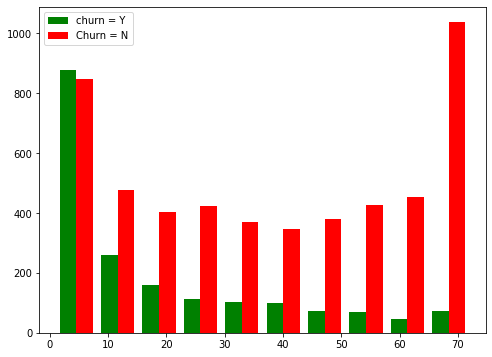

In [140]:
# Plotting the customer loyalty by plotting the tenure and the customer who has account and left

chun_no_tenure = ds[ds.Churn=='No'].tenure
chun_yes_tenure = ds[ds.Churn=='Yes'].tenure
labels=['churn = Y','Churn = N']
plt.figure(figsize=(8,6))
plt.hist([chun_yes_tenure,chun_no_tenure], color = ['green','red'])
plt.legend(labels)

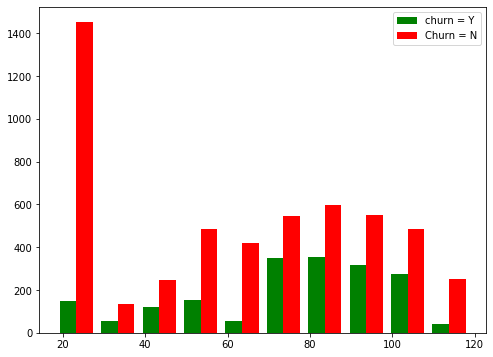

In [141]:
# Plotting the customer monthly charge and the customer who has account and left

chun_no_charge = ds[ds.Churn=='No'].MonthlyCharges
chun_yes_charge = ds[ds.Churn=='Yes'].MonthlyCharges
labels=['churn = Y','Churn = N']
plt.figure(figsize=(8,6))
plt.hist([chun_yes_charge,chun_no_charge], color = ['green','red'])
plt.legend(labels)

In [142]:
#Printing the unique object in dataset
def unique_object(data):
    for col in data:
        if data[col].dtypes==object:
            print(col,'  ',data[col].unique())

In [143]:
unique_object(ds)

gender    ['Female' 'Male']
Partner    ['Yes' 'No']
Dependents    ['No' 'Yes']
PhoneService    ['No' 'Yes']
MultipleLines    ['No phone service' 'No' 'Yes']
InternetService    ['DSL' 'Fiber optic' 'No']
OnlineSecurity    ['No' 'Yes' 'No internet service']
OnlineBackup    ['Yes' 'No' 'No internet service']
DeviceProtection    ['No' 'Yes' 'No internet service']
TechSupport    ['No' 'Yes' 'No internet service']
StreamingTV    ['No' 'Yes' 'No internet service']
StreamingMovies    ['No' 'Yes' 'No internet service']
Contract    ['Month-to-month' 'One year' 'Two year']
PaperlessBilling    ['Yes' 'No']
PaymentMethod    ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn    ['No' 'Yes']


In [144]:
# Replacing the same value with another name

ds.replace('No internet service','No',inplace=True)
ds.replace('No phone service','No',inplace=True)

In [145]:
unique_object(ds)

gender    ['Female' 'Male']
Partner    ['Yes' 'No']
Dependents    ['No' 'Yes']
PhoneService    ['No' 'Yes']
MultipleLines    ['No' 'Yes']
InternetService    ['DSL' 'Fiber optic' 'No']
OnlineSecurity    ['No' 'Yes']
OnlineBackup    ['Yes' 'No']
DeviceProtection    ['No' 'Yes']
TechSupport    ['No' 'Yes']
StreamingTV    ['No' 'Yes']
StreamingMovies    ['No' 'Yes']
Contract    ['Month-to-month' 'One year' 'Two year']
PaperlessBilling    ['Yes' 'No']
PaymentMethod    ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn    ['No' 'Yes']


In [146]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ds['Partner'] = le.fit_transform(ds['Partner'])
ds['Dependents'] = le.fit_transform(ds['Dependents'])
ds['PhoneService'] = le.fit_transform(ds['PhoneService'])
ds['MultipleLines'] = le.fit_transform(ds['MultipleLines'])
ds['OnlineSecurity'] = le.fit_transform(ds['OnlineSecurity'])
ds['OnlineBackup'] = le.fit_transform(ds['OnlineBackup'])
ds['DeviceProtection'] = le.fit_transform(ds['DeviceProtection'])
ds['TechSupport'] = le.fit_transform(ds['TechSupport'])
ds['StreamingTV'] = le.fit_transform(ds['StreamingTV'])
ds['StreamingMovies'] = le.fit_transform(ds['StreamingMovies'])
ds['PaperlessBilling'] = le.fit_transform(ds['PaperlessBilling'])
ds['Churn'] = le.fit_transform(ds['Churn'])


In [147]:
ds.dtypes

gender               object
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService      object
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [151]:
# Onehot encoding

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,7,14,16])],remainder='passthrough')
ds=ct.fit_transform(ds)

In [152]:
ds

array([[1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.9850e+01, 2.9850e+01,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 5.6950e+01, 1.8895e+03,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 5.3850e+01, 1.0815e+02,
        1.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.9600e+01, 3.4645e+02,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 7.4400e+01, 3.0660e+02,
        1.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0565e+02, 6.8445e+03,
        0.0000e+00]])

In [154]:
# Splitting regressor and response

x = ds[:,:-1]
y = ds[:,-1]

array([0., 0., 1., ..., 0., 1., 0.])

In [159]:
print(x[1],'\n')
print(y[1])

[0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 3.4000e+01 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 5.6950e+01 1.8895e+03] 

0


In [181]:
# Training and test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [182]:
print('X train', x_train.shape)
print('X test', x_test.shape)
print('Y train', y_train.shape)
print('Y test', y_test.shape)

X train (5274, 27)
X test (1758, 27)
Y train (5274,)
Y test (1758,)


In [196]:
# Scaling data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,15:16] = sc.fit_transform(x_train[:,15:16])
x_test[:,15:16] = sc.transform(x_test[:,15:16])
x_train[:,25:27] = sc.fit_transform(x_train[:,25:27])
x_test[:,25:27] = sc.transform(x_test[:,25:27])


In [197]:
print(x_train[1])

[ 0.          1.          0.          0.          1.          0.
  0.          1.          1.          0.          0.          0.
  0.          1.          1.          1.46485552  1.          0.
  0.          0.          0.          0.          0.          0.
  0.         -1.4956825  -0.39270455]


In [198]:
x_test[1]

array([ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.65795657,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
       -1.47401819, -0.85618406])

### Building ANN

In [200]:
#Required packages

import tensorflow as tf
from tensorflow.keras import * 

In [205]:
#Initializing the model

model = keras.Sequential()

#Adding first layer
model.add(keras.layers.Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=27))

#Adding second layer
model.add(keras.layers.Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

#Adding output layer
model.add(keras.layers.Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [206]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 168       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [213]:
# Compiling the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.AUC()])

In [214]:
#fitting the model with training set

model_fit = model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
354/354 [==============================] - 5s 9ms/step - loss: 0.5044 - auc: 0.7633 - val_loss: 0.4535 - val_auc: 0.8019
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.4440 - auc: 0.8269 - val_loss: 0.4403 - val_auc: 0.8174
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.4305 - auc: 0.8393 - val_loss: 0.4361 - val_auc: 0.8230
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.4242 - auc: 0.8446 - val_loss: 0.4322 - val_auc: 0.8271
Epoch 5/100
354/354 [==============================] - 4s 11ms/step - loss: 0.4196 - auc: 0.8487 - val_loss: 0.4294 - val_auc: 0.8293
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.4185 - auc: 0.8495 - val_loss: 0.4286 - val_auc: 0.8300
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.4162 - auc: 0.8514 - val_loss: 0.4277 - val_auc: 0.8311
Epoch 8/100
354/354 [==============================] - 2s 7ms/step -

In [230]:
y_pred = model.predict(x_test)

55/55 [==============================] - 0s 2ms/step


In [232]:
y_pred_n = []

for i in y_pred:
    if i > 0.5:
        y_pred_n.append(1)
    else:
        y_pred_n.append(0)

In [233]:
y_pred_n

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [235]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_n)

array([[1158,  153],
       [ 197,  250]], dtype=int64)